# The Sparks Foundation

# Author - Kishlay Kumar

# Task-5 : Object-Detection/Optical-Character-Recognition

In [1]:
import pytesseract

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
pytesseract.pytesseract.tesseract_cmd= r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [6]:
img = cv2.imread('figure-65.png')

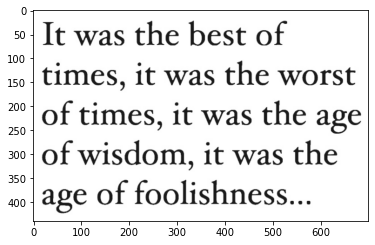

In [7]:
plt.imshow(img)

In [8]:
img2char = pytesseract.image_to_string(img)

In [9]:
print(img2char)

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



In [10]:
imgbox = pytesseract.image_to_boxes(img)

In [11]:
print(imgbox)

I 21 367 43 415 0
t 46 366 67 403 0
w 85 366 137 397 0
a 138 366 166 398 0
s 170 366 191 398 0
t 213 366 234 403 0
h 237 367 274 417 0
e 277 366 304 398 0
b 325 365 359 418 0
e 365 366 392 398 0
s 382 365 407 418 0
t 398 366 445 403 0
o 467 366 499 398 0
f 504 367 531 417 0
t 19 283 40 320 0
i 44 284 61 331 0
m 64 284 118 315 0
e 103 272 134 331 0
s 121 283 149 315 0
, 155 272 192 315 0
i 215 284 231 331 0
t 234 283 256 320 0
w 273 283 325 314 0
a 326 283 355 315 0
s 358 283 379 315 0
t 401 283 423 320 0
h 426 284 462 334 0
e 465 283 493 315 0
w 511 283 563 314 0
o 563 283 595 315 0
r 599 284 623 315 0
s 626 283 648 315 0
t 652 283 674 320 0
o 19 200 51 232 0
f 57 201 84 251 0
t 97 200 118 237 0
i 122 201 138 248 0
m 142 201 196 233 0
e 181 189 208 248 0
s 199 200 227 232 0
, 232 189 270 232 0
i 292 201 308 248 0
t 312 200 333 237 0
w 351 200 402 231 0
a 404 200 432 232 0
s 436 200 457 232 0
t 479 200 500 237 0
h 504 201 540 251 0
e 543 200 570 232 0
a 593 200 622 232 0
g 622 182 656 2

In [12]:
type(imgbox)

str

In [13]:
imgH,imgW,_=img.shape

In [14]:
img.shape

(440, 700, 3)

In [15]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x,y,w, h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img,(x,imgH-y),(w,imgH-h),(0,0,255),3)

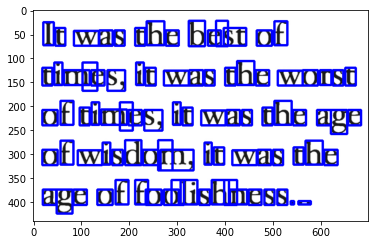

In [16]:
plt.imshow(img)

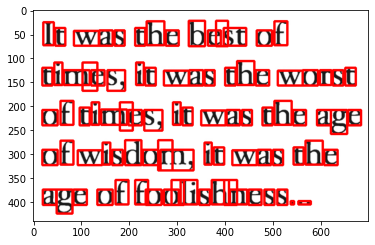

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video demo

In [21]:
import numpy as np

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture('text.mp4')
#cap.set(cv2.CAP_PROP_FPS,170)
#check if webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot Open Video')
cntr = 0;
while True:
    ret,frame = cap.read()
    cntr = cntr+1;
    if ((cntr%20)==0):
        imgH,imgW,_=frame.shape
  
        x1,y1,w1,h1 = 0,0,imgH,imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(img,(x,imgH-y),(w,imgH-h),(0,0,255),3)
        #cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,imgchar,(x1 + int(w1/50),y1 + int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.imshow('Text Detection Tutorial',frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'): #press q to exit
            break
            
cap.release()
cv2.destroyAllWindows()